# 07-01: Generating functions

*November 30th 2022*  

In this practice session, we explore probability generation generating functions corresponding to different degree distributions.

In [11]:
import pathpy as pp
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

from collections import Counter

plt.style.use('default')
sns.set_style("whitegrid")

## Plotting generating functions for given degree distributions

We first implement a `python` function that plots the probability generating function of a given degree distribution, based on the definition given in lecture 7. 

In [12]:
def degree_distribution(network):
    degrees = pp.statistics.degree_sequence(network)
    Nk = Counter(degrees)
    dist = {}
    for k in set(degrees):
        dist[k] = Nk[k]/len(degrees)
    return dist

def generating_function(network, x):
    g_0 = 0
    dist = degree_distribution(network)
    for k in set(pp.statistics.degree_sequence(network)):
        g_0 += dist[k] * x**k
    return g_0

Let us apply this function to the undirected example network that we use in the lecture:

In [13]:
n = pp.Network(directed = False)
n.add_edge('a', 'b')
n.add_edge('b', 'c')
n.add_edge('b', 'd')
n.add_edge('c', 'a')
n.add_edge('d', 'e')
n.add_edge('e', 'f')
n.add_edge('f', 'd')
n.add_edge('f', 'g')
n.add_edge('g', 'd')
n.plot()

Text(0, 0.5, '$G_0(x)$')

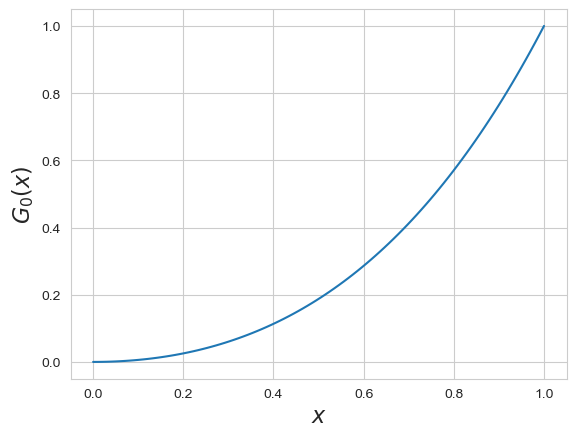

In [14]:
x = np.linspace(0, 1, 100)
y = generating_function(n, x)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

## Plotting generating functions based on empirical networks

We can also plot generating functions for large empirical networks. We read some real networks from the SQLite database and plot the generating function of their| degree distribution.

Text(0, 0.5, '$G_0(x)$')

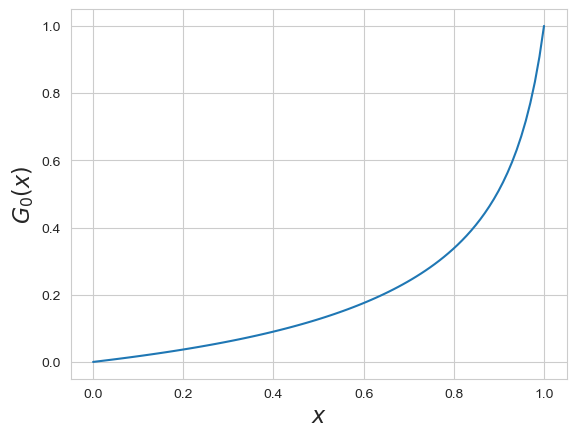

In [15]:
n_lotr = pp.io.sql.read_network('../data/networks.db', sql='SELECT DISTINCT source, target from lotr')

y = generating_function(n_lotr, x)
ax = sns.lineplot(x=x, y=y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$G_0(x)$')

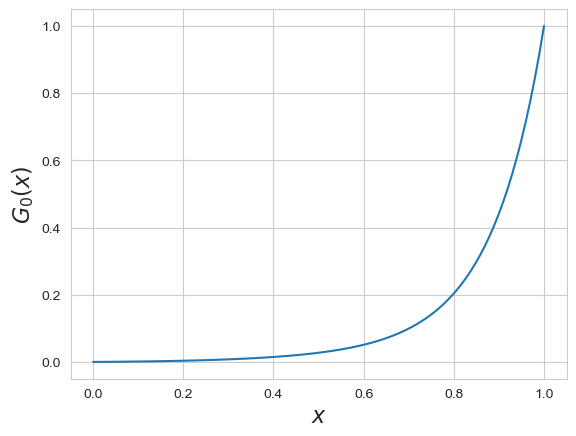

In [6]:
n_highschool = pp.io.sql.read_network('../data/networks.db', sql='SELECT DISTINCT source, target from highschool')

y = generating_function(n_highschool, x)
ax = sns.lineplot(x, y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$G_0(x)$')

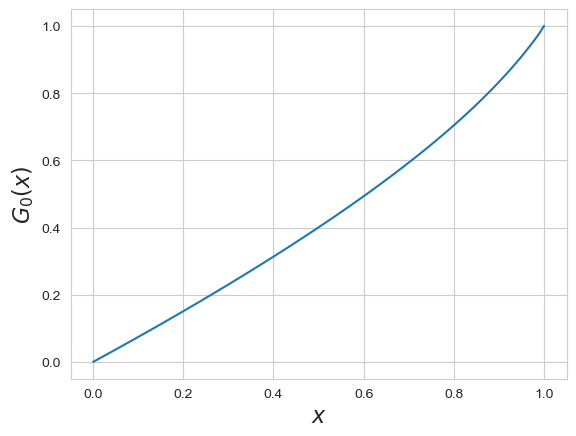

In [7]:
n_gentoo = pp.io.sql.read_network('../data/networks.db', sql='SELECT DISTINCT source, target from gentoo')

y = generating_function(n_gentoo, x)
ax = sns.lineplot(x, y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$G_0(x)$')

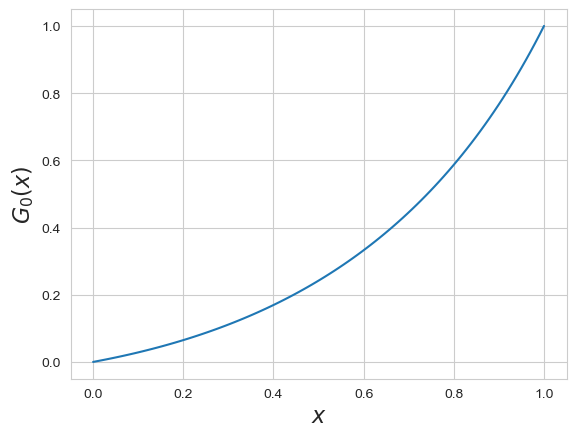

In [8]:
n_pg = pp.io.sql.read_network('../data/networks.db', sql='SELECT DISTINCT source, target from powergrid')

y = generating_function(n_pg, x)
ax = sns.lineplot(x, y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)

## Generating functions in `pathpy`

Since generating functions are a central method in the analysis of expected properties of random microstates, `pathpy` provides functions to compute and plot generating functions based on the degree distribution of a given network instance.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$G_0(x)$')

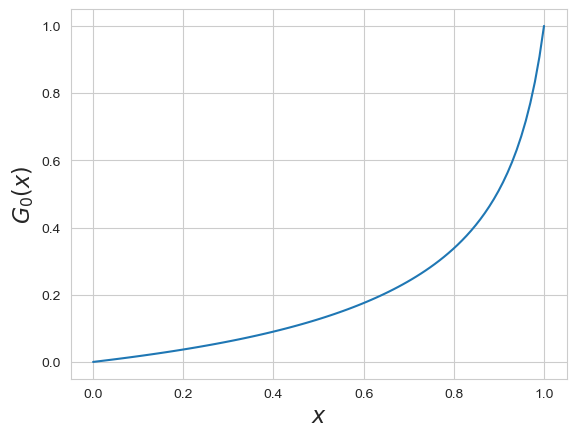

In [9]:
x = np.linspace(0, 1, 100)
y = pp.statistics.degree_generating_function(n_lotr, x)
ax = sns.lineplot(x, y)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$G_0(x)$', fontsize=16)